# Minimum Fuel Landing on Mars
This notebook provides examples to solve minimum fuel soft landing problem on Mars. We assume constant gravity; flat-planet assumption. 

In [1]:
import numpy as np
import cvxpy as cp
import sys
sys.path.append("../../")
import src.lcvx as lc
from src.visualization import *
%load_ext autoreload
%matplotlib inline

In [2]:
# Simulation configuration
rocket = lc.Rocket(
    g_=3.7114,
    mdry=1505.0,
    mwet=1905.0,
    Isp=225.0,
    rho1=4972.0,
    rho2=13260.0,
    gsa=25 * np.pi / 180,
    pa=30 * np.pi / 180,
    vmax=200.0,
)
N = 55
tf = 75.0
dt = tf / N
x0 = np.array([2000.0, 500.0, 1500.0, -100.0, 50.0, -75.0, np.log(rocket.mwet)])  # Initial state vector (m, m, m, m/s, m/s, m/s, kg)

In [4]:
# Define the problem
lcvx = lc.LCvxMinFuel(
        rocket=rocket,
        N=N,
        parameterize_x0=False,
        parameterize_tf=False,
        fixed_target=True,
    )
prob = lcvx.problem(x0=x0, tf=tf)
prob.solve(solver=cp.ECOS, verbose=True)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Nov 03 05:47:07 PM: Your problem has 612 variables, 230 constraints, and 0 parameters.
(CVXPY) Nov 03 05:47:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 03 05:47:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 03 05:47:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 03 05:47:07 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 03 05:47:07 PM: Compiling problem (target solver=ECOS).
(

391.16521002492857

Problem is DCP: True
Problem is DPP: True


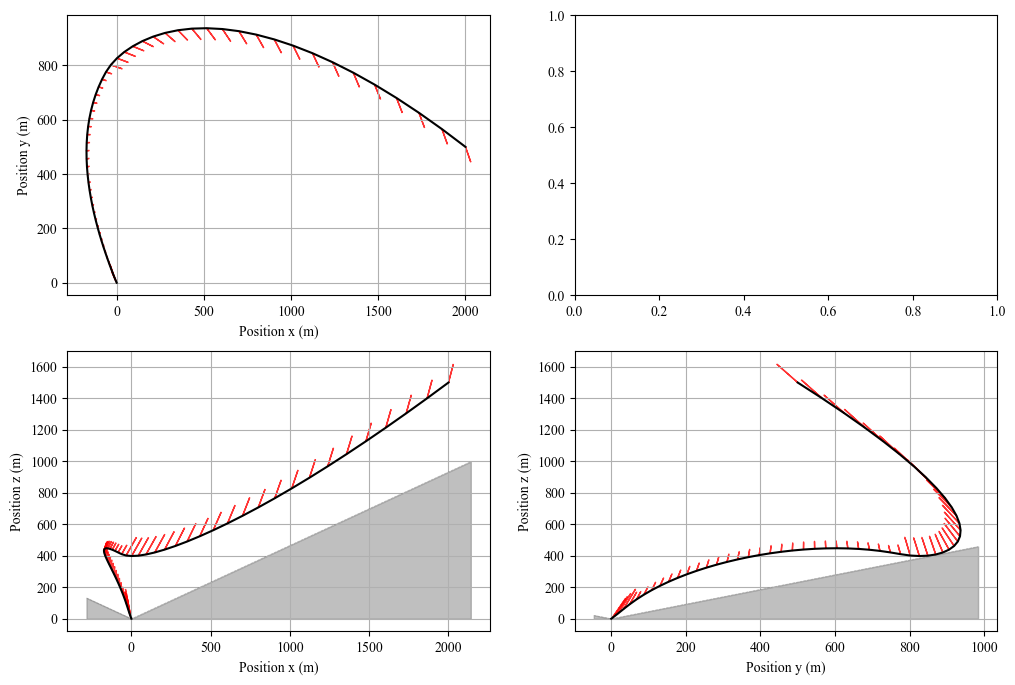

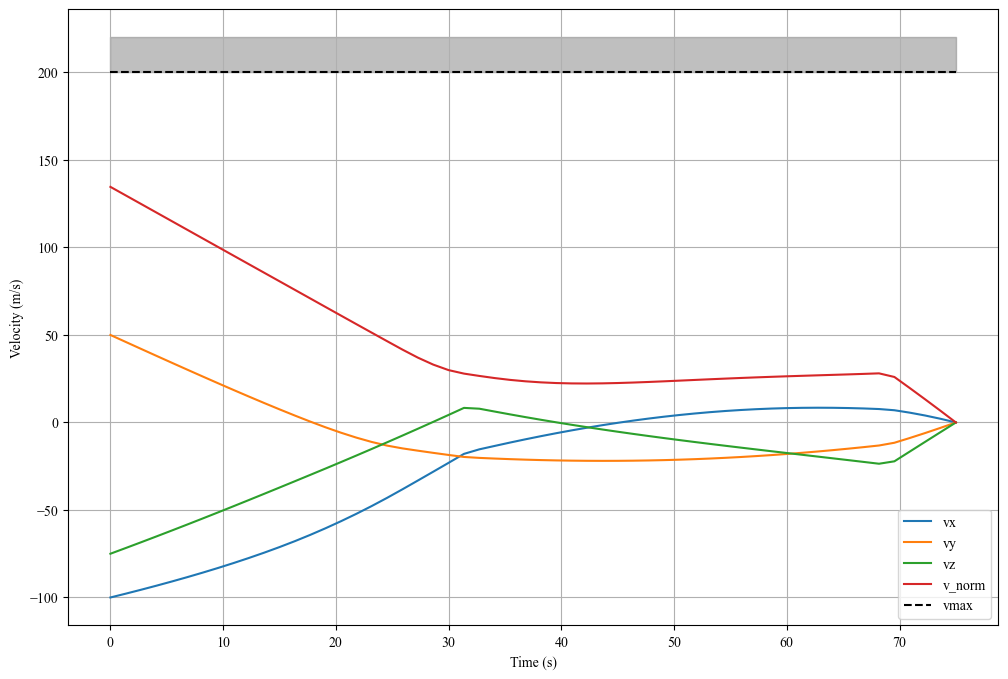

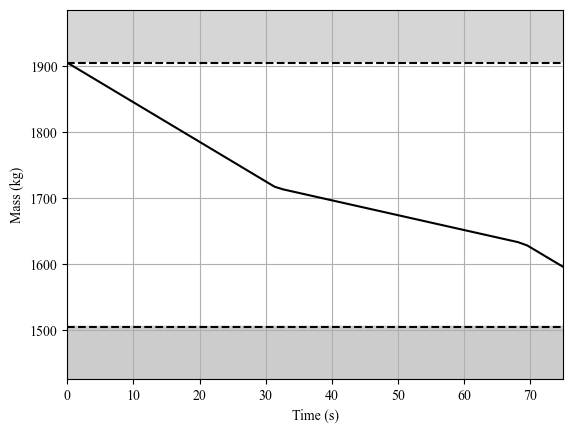

(55,)


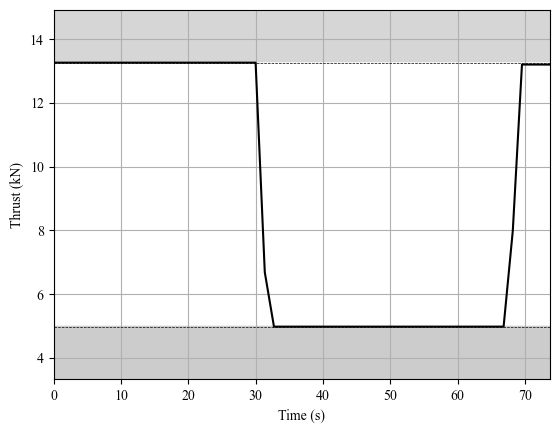

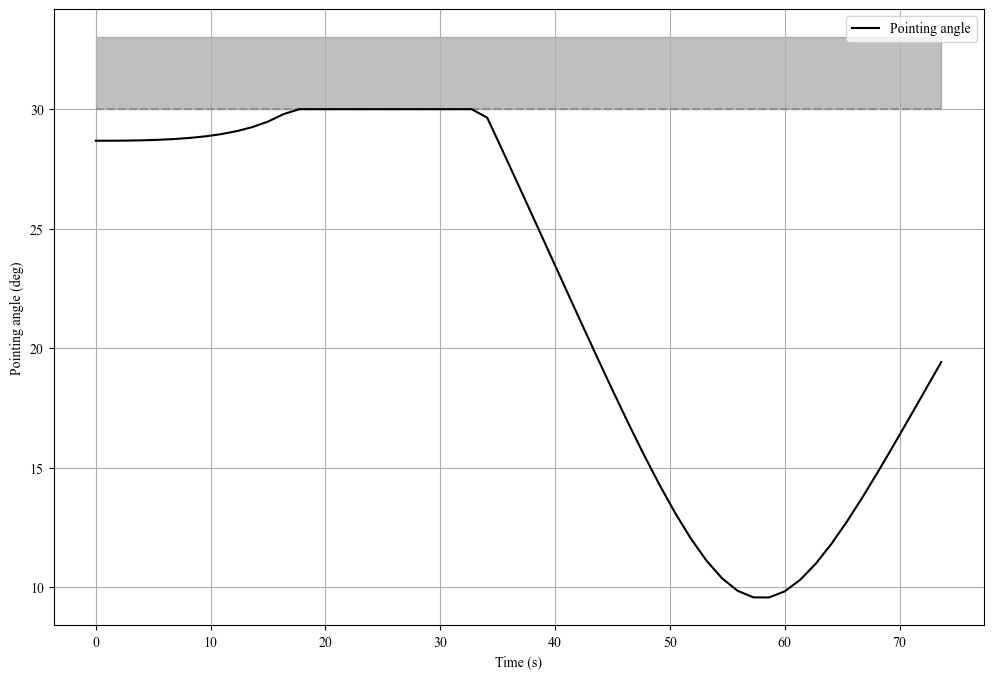

In [6]:
print(f"Problem is DCP: {prob.is_dcp()}")
print(f"Problem is DPP: {prob.is_dpp()}")

sol = lc.get_vars(prob, ["X", "U"])
X_sol = sol["X"]
U_sol = sol["U"]
r, v, z, u, sigma = lcvx.recover_variables(X_sol, U_sol)

# visualize
m = np.exp(z)
X = np.hstack((r.T, v.T, m.reshape(-1, 1)))
U = u.T * m[:-1].reshape(-1, 1)

# Plot results
t = np.linspace(0, tf, lcvx.N + 1)
plot_3sides(t[:-1], X, U, uskip=1, gsa=rocket.gsa)

plot_vel(t, X, rocket.vmax)

plot_mass(t, X, rocket.mdry, rocket.mwet)

plot_thrust_mag(t[:-1], U, rocket.rho2, rocket.rho1)

plot_pointing(t[:-1], U, rocket.pa)